In [1]:
import config
import helpers


import pandas as pd
import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import plotly.graph_objects as go
%matplotlib inline

#Stock package
from yahoo_fin import stock_info as si


#Plotly Dash components 
import jupyterlab_dash
import dash
import dash_core_components as dcc
import dash_html_components as html
external_stylesheets = ['https://codepen.io/gullpavon1/pen/bGVWQEr.css']

#Connect to Federal Reserve Economic Data
fred = Fred(api_key=config.fred_api_code)

#Search for FRED data
#fred.search('mortgage').T


In [2]:
###### GET DATA ########

#Mortgage Rates Data
MORTGAGE30US = fred.get_series_all_releases('MORTGAGE30US')
fast_filter = (MORTGAGE30US.date >= '2020-01-01')
MORTGAGE30US = MORTGAGE30US[fast_filter]

MORTGAGE15US = fred.get_series_all_releases('MORTGAGE15US')
fast_filter = (MORTGAGE15US.date >= '2020-01-01')
MORTGAGE15US = MORTGAGE15US[fast_filter]

MPRIME = fred.get_series_all_releases('MPRIME')
fast_filter = (MPRIME.date >= '2020-01-01')
MPRIME = MPRIME[fast_filter]

#Home Data
EXHOSLUSM495S = fred.get_series('EXHOSLUSM495S').to_frame().reset_index()
EXHOSLUSM495S = EXHOSLUSM495S.rename(columns={"index": "date", EXHOSLUSM495S.columns[1]: "value"})
fast_filter = (EXHOSLUSM495S.date >= '2020-01-01')
EXHOSLUSM495S = EXHOSLUSM495S[fast_filter] 

MSACSR = fred.get_series_all_releases('MSACSR') 
fast_filter = (MSACSR.date >= '2020-01-01')
MSACSR = MSACSR[fast_filter] #  Monthly Supply of Houses in the United States


#MONEY SUPPLY VS INFLATION
BOGMBASEW = fred.get_series_all_releases('BOGMBASEW') 
fast_filter = (BOGMBASEW.date >= '2020-01-01')
BOGMBASEW = BOGMBASEW[fast_filter] # Monetary Base

M2 = fred.get_series_all_releases('M2') 
fast_filter = (M2.date >= '2020-01-01')
M2 = M2[fast_filter] #  M2 Money Stock (M2)

CPIAUCSL = fred.get_series_all_releases('CPIAUCSL') 
fast_filter = (CPIAUCSL.date >= '2020-01-01')
CPIAUCSL = CPIAUCSL[fast_filter] #   Consumer Price Index for All Urban Consumers: All Items in U.S. City Average





#Live Stock Prices
def get_stock_data(ticker, metric_type):
    '''
    NOTES:
    STOCK_LIVE = round(si.get_live_price("FRC"),2)
    STOCK_PREV = round(si.get_quote_table('FRC').get('Previous Close'),2)
    FRC_CHG = round((FRC_STOCK_LIVE - FRC_STOCK_PREV) / (FRC_STOCK_PREV) * 100,2)

    '''
    if metric_type == 'live':
        return round(si.get_live_price(ticker),2)
    if metric_type == 'prev':
         return round(si.get_quote_table(ticker).get('Previous Close'),2)
    if metric_type == 'perc_chg':
         return round((round(si.get_live_price(ticker),2) - round(si.get_quote_table(ticker).get('Previous Close'),2)) / (round(si.get_quote_table(ticker).get('Previous Close'),2)) * 100,2)


def color_picker(value_input):
    if value_input > 0:
        return '#409f83'
    else: 
        return '#ef3b46'


In [3]:

x = MORTGAGE30US['date']
x2 = MORTGAGE30US['date'].astype(np.int64)
y = MORTGAGE30US['value']

data = go.Scatter(x=x, y=y, mode='lines+markers', marker={'color': x2, 'colorscale': 'Rainbow', 'size': 10},)

layout = dict(plot_bgcolor='white', margin=dict(t=0, b=0, r=0, l=0, pad=0),
              xaxis=dict(showgrid=False, zeroline=False, mirror=True, linecolor='gray'),
              yaxis=dict(showgrid=False, zeroline=False, mirror=True, linecolor='gray'))

fig = go.Figure(data=data, layout=layout)

In [4]:
#Styling / CSS Stuff 

stock_ticker_style={'background':'#36404e', 'padding-top': '3px','padding-right':'6px','padding-bottom':'3px', 'padding-left': '6px', }


In [5]:
#Dash App
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div( style={'padding-top': '10px',} , children=[

#STOCK TICKER INFO
 html.Div([
    html.Div([


   html.Div([
      #blank for center purposes
        ], className="two columns"),

        html.Div([
        html.H2(f'FRC ${get_stock_data("FRC", "live")}'),
        html.H4(f'{get_stock_data("FRC", "perc_chg")}%', style={'color': f'{color_picker(get_stock_data("FRC", "perc_chg"))}'}),
        ], className="two columns", style=stock_ticker_style),

        html.Div([
        html.H2(f'JPM ${get_stock_data("JPM", "live")}'),
        html.H4(f'{get_stock_data("JPM", "perc_chg")}%', style={'color': f'{color_picker(get_stock_data("JPM", "perc_chg"))}'}),
        ], className="two columns", style=stock_ticker_style),

        html.Div([
        html.H2(f'BAC ${get_stock_data("BAC", "live")}'),
        html.H4(f'{get_stock_data("BAC", "perc_chg")}%', style={'color': f'{color_picker(get_stock_data("BAC", "perc_chg"))}'}),
        ], className="two columns", style=stock_ticker_style),


        html.Div([
        html.H2(f'WFC ${get_stock_data("WFC", "live")}'),
        html.H4(f'{get_stock_data("WFC", "perc_chg")}%', style={'color': f'{color_picker(get_stock_data("WFC", "perc_chg"))}'}),
        ], className="two columns", style=stock_ticker_style),


   html.Div([
      #blank for center purposes
        ], className="two columns"),



    ], className="row", style={'textAlign': 'center',  })
]),



    html.H1(children='Hello  WTF Dash'),

   
    
   
#dcc.Graph(figure=fig),

    html.Div(children='''
        Dash: A web application framework for Python. 
    '''),

    dcc.Graph(
        id='MORTGAGE_RATES',
        figure={
            'data': [
                 { "x": MORTGAGE30US['date'],"y": MORTGAGE30US['value'],"mode": "lines","name": '30 YR', 'line': {'color': '#9F86FF' }},
                 { "x": MORTGAGE15US['date'],"y": MORTGAGE15US['value'],"mode": "lines","name": '15 YR', 'line': {'color': '#1CA8DD'}},
               
              
            ],
            'layout': {
                'title': 'MORTGAGE RATES',
                "paper_bgcolor": "rgb(46, 54, 65)",
                "plot_bgcolor": "rgb(46, 54, 65)",
                'font': {
                    'color': "rgb(255,255,255)"
                }
            }
        }
       
    ),




#####################################################################################################################
#ROW 2 
html.Div([
html.Div([
  dcc.Graph(
        id='M1',
        figure={
            'data': [
                 { "x": BOGMBASEW['date'],"y": BOGMBASEW['value'],"mode": "lines","name": 'Monetary Base', 'line': {'color': '#9F86FF' }},
               
              
            ],
            'layout': {
                'title': 'Monetary Base',
                "paper_bgcolor": "rgb(46, 54, 65)",
                "plot_bgcolor": "rgb(46, 54, 65)",
                'font': {'color': "rgb(255,255,255)"},
              #  'yaxis': {'type': 'log', 'autorange': 'true'}, #log functionality 
            }
        }
       
    ), ], className="two columns"),

#---

html.Div([      
    dcc.Graph(
        id='M2',
        figure={
            'data': [
                 { "x": M2['date'],"y": M2['value'],"mode": "lines","name": 'M2', 'line': {'color': '#1CA8DD'}},
               
              
            ],
            'layout': {
                'title': 'M2',
                "paper_bgcolor": "rgb(46, 54, 65)",
                "plot_bgcolor": "rgb(46, 54, 65)",
                'font': {'color': "rgb(255,255,255)"},
              #  'yaxis': {'type': 'log', 'autorange': 'true'}, #log functionality 
            }
        }
       
    ),

#---

        html.Div([

    dcc.Graph(
        id='CPI',
        figure={
            'data': [
                  { "x": CPIAUCSL['date'],"y": CPIAUCSL['value'],"mode": "lines","name": 'CPI - Inflation', 'line': {'color': '#FFFFFF'}},


               
              
            ],
            'layout': {
                'title': 'CPI - Inflation',
                "paper_bgcolor": "rgb(46, 54, 65)",
                "plot_bgcolor": "rgb(46, 54, 65)",
                'font': {'color': "rgb(255,255,255)"},
              #  'yaxis': {'type': 'log', 'autorange': 'true'}, #log functionality 
            }
        }
       
    )
       

        ], className="two columns", style=stock_ticker_style),




 ], className="row", style={'textAlign': 'center',  }),






#######################################################################################################################


 



 
              

])

if __name__ == '__main__':
    app.run_server(debug=False)

* Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [01/May/2020 10:56:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/May/2020 10:56:12] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [01/May/2020 10:56:12] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [01/May/2020 10:56:12] "GET /_favicon.ico?v=1.11.0 HTTP/1.1" 200 -


Text(0, 0.5, 'Rate')

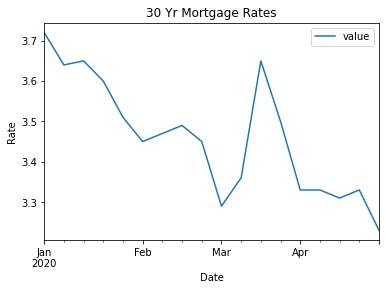

In [6]:
#30 Yr Mortgage Rates
MORTGAGE30US.plot.line(x='date', y='value')
plt.title ('30 Yr Mortgage Rates')
plt.xlabel ('Date')
plt.ylabel ('Rate')


Text(0, 0.5, 'Rate')

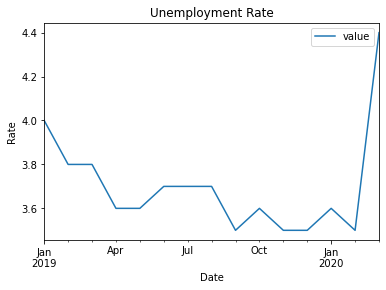

In [7]:

#Unemployment Rate
#For Unemployment number use: UNEMPLOY
UNRATE = fred.get_series_all_releases('UNRATE')
UNRATE = UNRATE[UNRATE.date >= '2019-01-01']

UNRATE.plot.line(x='date', y='value')
plt.title ('Unemployment Rate')
plt.xlabel ('Date')
plt.ylabel ('Rate')

Text(0, 0.5, 'Rate')

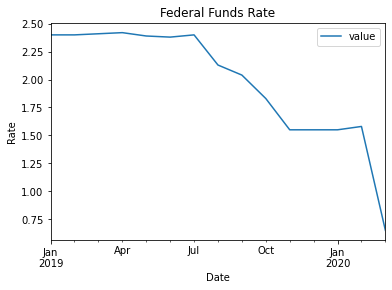

In [8]:


#Fed Funds Rate
FEDFUNDS = fred.get_series_all_releases('FEDFUNDS')
FEDFUNDS = FEDFUNDS[FEDFUNDS.date >= '2019-01-01']

FEDFUNDS.plot.line(x='date', y='value')
plt.title ('Federal Funds Rate')
plt.xlabel ('Date')
plt.ylabel ('Rate')

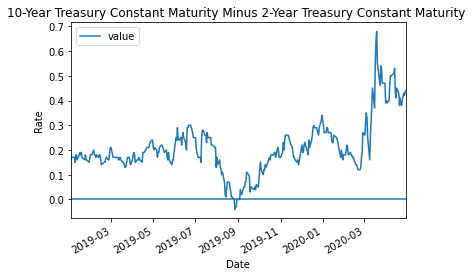

In [9]:

#10-2 Treasury Yield Spread
T10Y2Y = fred.get_series_all_releases('T10Y2Y')
T10Y2Y = T10Y2Y[T10Y2Y.date >= '2019-01-01']
T10Y2Y.dropna(inplace= True)

T10Y2Y.plot.line(x='date', y='value')
plt.title ('10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity ')
plt.xlabel ('Date')
plt.ylabel ('Rate')
plt.axhline(0, 0, 1, label='0')

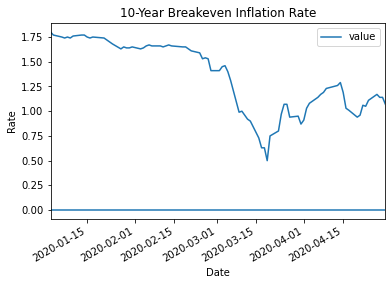

In [10]:
#10-2 Treasury Yield Spread
T10YIE = fred.get_series_all_releases('T10YIE')
T10YIE = T10YIE[T10YIE.date >= '2020-01-01']
T10YIE.dropna(inplace= True)


T10YIE.plot.line(x='date', y='value')
plt.title ('10-Year Breakeven Inflation Rate')
plt.xlabel ('Date')
plt.ylabel ('Rate')
plt.axhline(0, 0, 1, label='0')


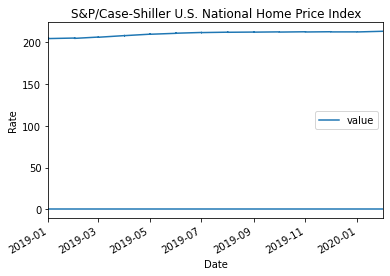

In [11]:

CSUSHPINSA = fred.get_series_all_releases('CSUSHPINSA')
CSUSHPINSA = CSUSHPINSA[CSUSHPINSA.date >= '2019-01-01']
CSUSHPINSA.dropna(inplace= True)
CSUSHPINSA.plot.line(x='date', y='value')

plt.title ('S&P/Case-Shiller U.S. National Home Price Index')
plt.xlabel ('Date')
plt.ylabel ('Rate')
plt.axhline(0, 0, 1, label='0')

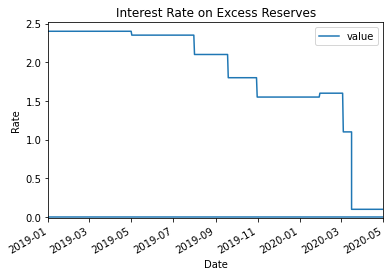

In [12]:

IOER = fred.get_series_all_releases('IOER')
IOER = IOER[IOER.date >= '2019-01-01']
IOER.dropna(inplace= True)
IOER.plot.line(x='date', y='value')

plt.title ('Interest Rate on Excess Reserves')
plt.xlabel ('Date')
plt.ylabel ('Rate')
plt.axhline(0, 0, 1, label='0')

In [13]:
 """Bank Prime Loan Rate (MPRIME)
 Existing Home Sales (EXHOSLUSM495S)
 Monthly Supply of Houses in the United States (MSACSR)
 Real Gross Domestic Product (GDPC1)
 10-Year Treasury Constant Maturity Rate (DGS10)
 Monetary Base; Total (BOGMBASEW)
 M2 Money Stock (M2)
 Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
 """

'Bank Prime Loan Rate (MPRIME)\nExisting Home Sales (EXHOSLUSM495S)\nMonthly Supply of Houses in the United States (MSACSR)\nReal Gross Domestic Product (GDPC1)\n10-Year Treasury Constant Maturity Rate (DGS10)\nMonetary Base; Total (BOGMBASEW)\nM2 Money Stock (M2)\nConsumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)\n'